In [2]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cmap
import seaborn as sns
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("crime_data.csv")

Insights :

-  .read_csv is a function of pandas library.

-  we use .read_csv function to read the csv files.

-  Import csv file and convert it to a DataFrame object

In [4]:
df.head()  # use .head to see first 5 element of DataFrame

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Insights :

-  .head() function is use to see first 5 elements of the data frame 

-  we can get just some idea about data by using .head() function like how many colums we have and how data is string or numeric etc.

In [5]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Insights :

-  To see Column name we use .columns function

In [6]:
df.shape # using .shape for knowing the rows n colloumns 

(50, 5)

Insights :

-  .shape function use to see the shape of the data frame like how many rows and columns its contain 

-  its also shows the data is one dimensional or two dimensional


In [7]:
df.info() # .info() shows the columns names how any rows are non-null and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Insights :

-  .info() function is use to see data type of the columns.

-  to see how many rows contains value means not null 

In [8]:
df.describe() # .describe use to calculate the some statistical data 

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Insights :

-  .describe() function is statistical funtion

-  To see some mathematical operation on data frame. it is perfom mathematical operation only on numerical data like the columns which contains numeric data. 

In [9]:
df.dtypes  # to see data types 

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [10]:
df.count() # to see count

Unnamed: 0    50
Murder        50
Assault       50
UrbanPop      50
Rape          50
dtype: int64

In [11]:
#To see sum of the NA values
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Insights :

-  .isnull() function to see the null data present in the data frame

-  we use .sum() function after .isnull() for taking sum of the null values (how many rows contains null values)

In [12]:
df_new = df.drop(['Unnamed: 0'],axis=1) # .drop use to drop data and axis = 1 is used for column

Insights :

-  We are droping column Unnamed column because it is not that much use ful in the curret case however it a Object and in clustring we can not do clusters with object data types.

# Visualization of Data Frame 

Murder


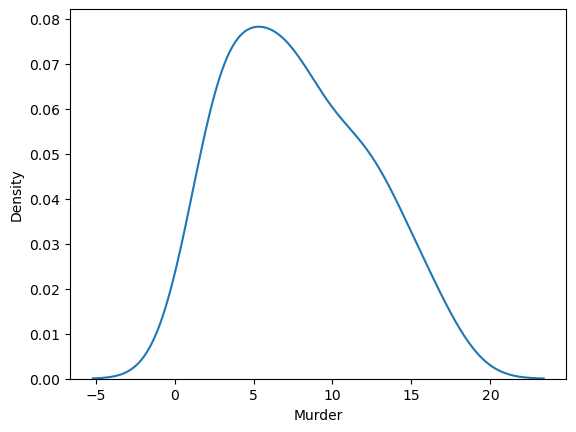

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Assault


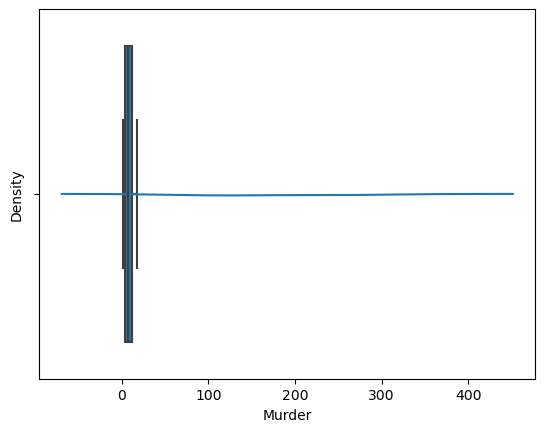

UrbanPop


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


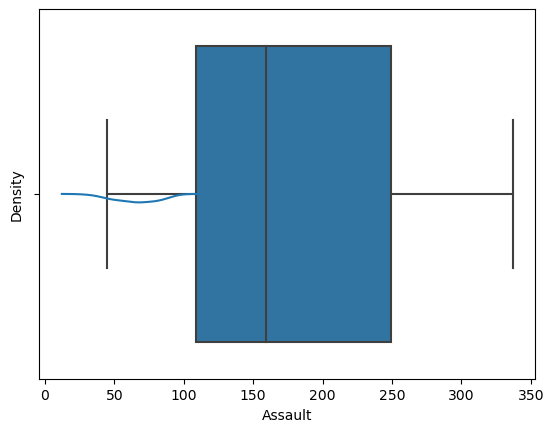

Rape


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


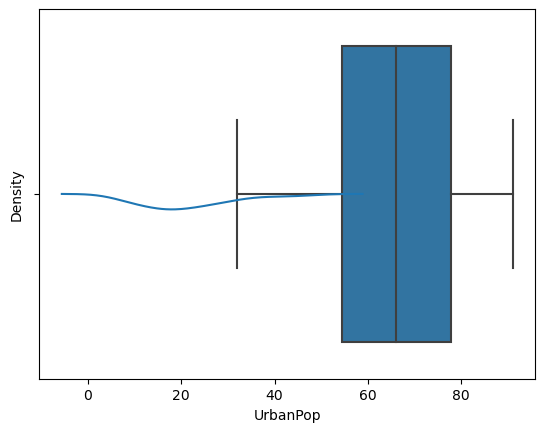

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


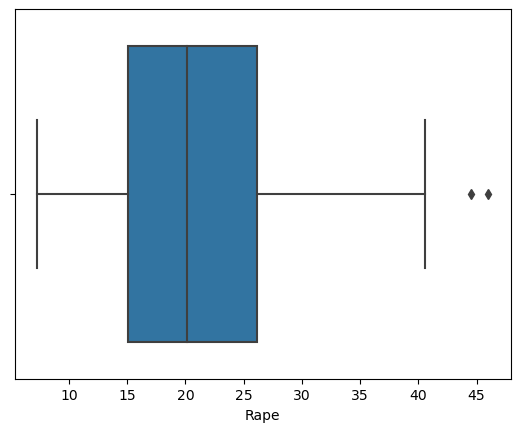

In [13]:
for i in df_new.columns:
    print(i)
    sns.kdeplot(df[i])
    plt.show()
    sns.boxplot(df_new[i])
    plt.show

<AxesSubplot:>

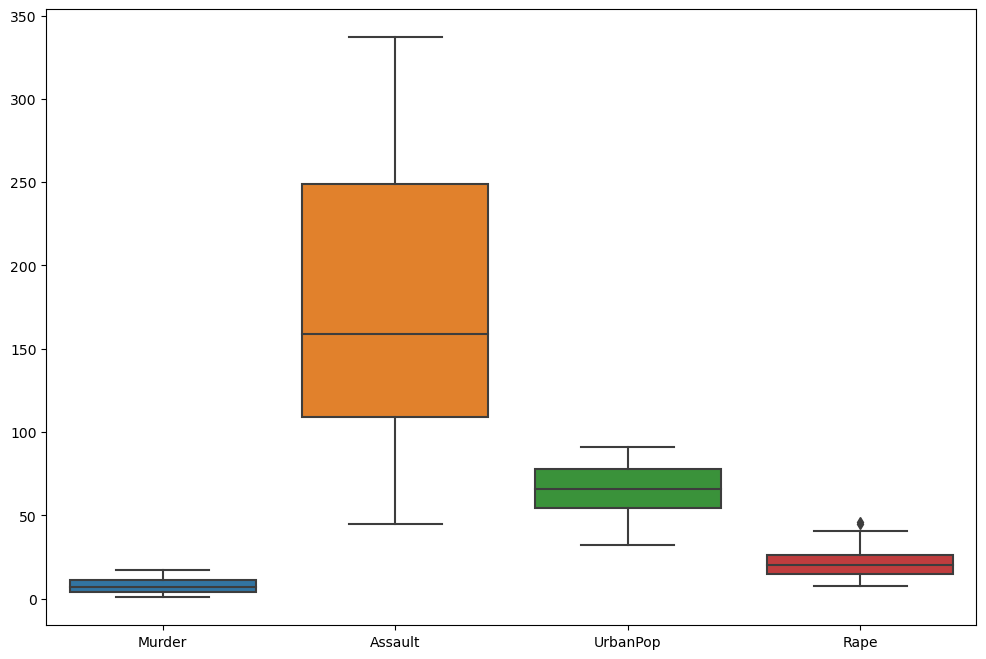

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_new)

Insights :

-  Ploting a common boxplot to see the outliers

-  From above boxplot we can clearly see that our data framecontains as outliers

<AxesSubplot:>

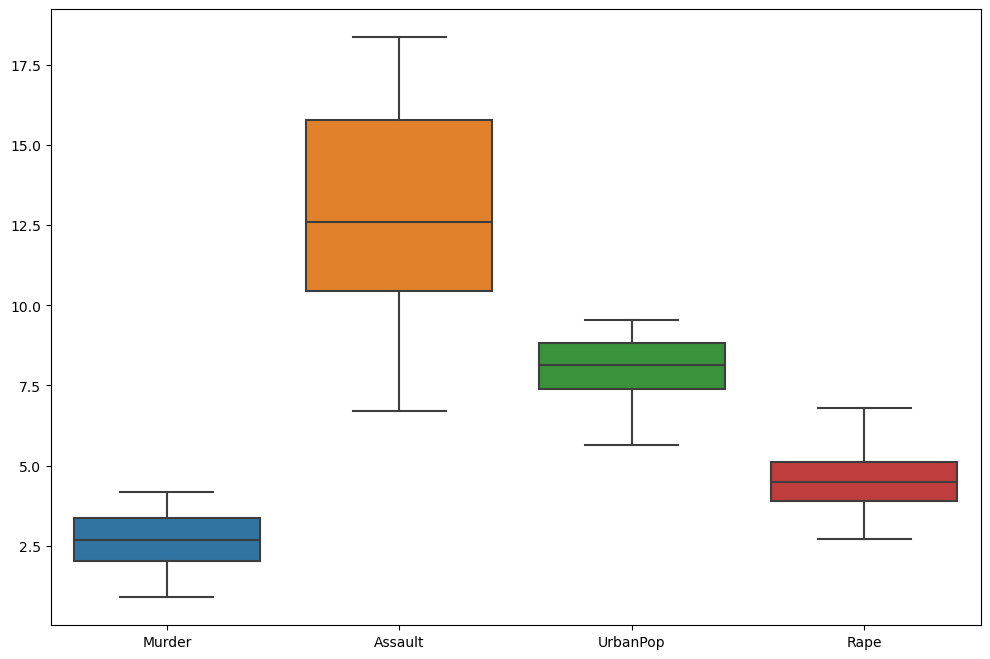

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df_new))

Insights : 

-  By doing transformation we are trying to remove outliers.

-  we can clearly see that now in our data outliers are not present.

In [16]:
np.sqrt(df_new).isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Insights :

-  Checking our transformation contains null value or not.

In [17]:
df1 = np.sqrt(df_new)

Insights : 

-  Storing all data where we have done transformation

In [18]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,3.633180,15.362291,7.615773,4.604346
1,3.162278,16.217275,6.928203,6.670832
2,2.846050,17.146428,8.944272,5.567764
3,2.966479,13.784049,7.071068,4.415880
4,3.000000,16.613248,9.539392,6.371813


In [19]:
df1.shape

(50, 4)

Murder


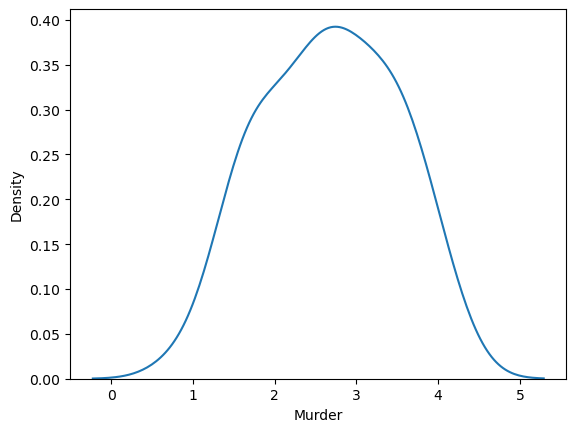

Assault


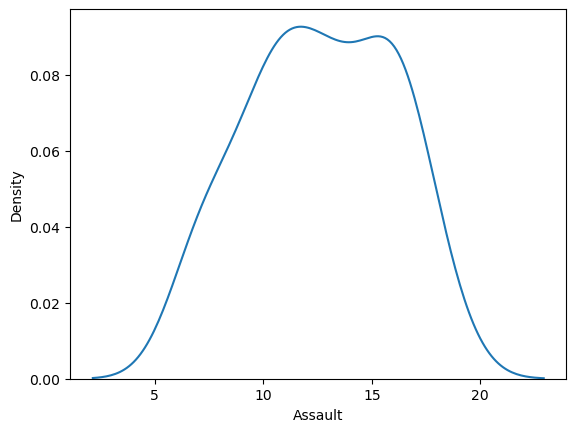

UrbanPop


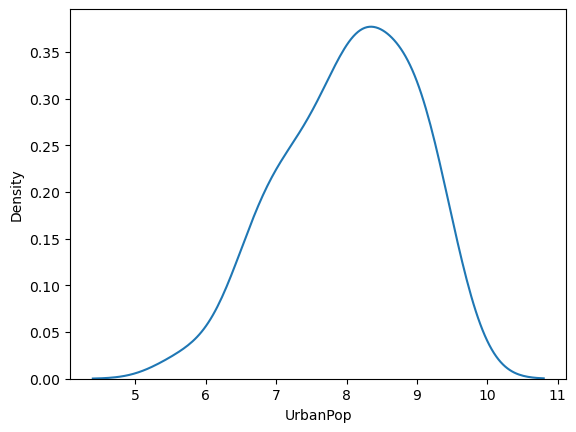

Rape


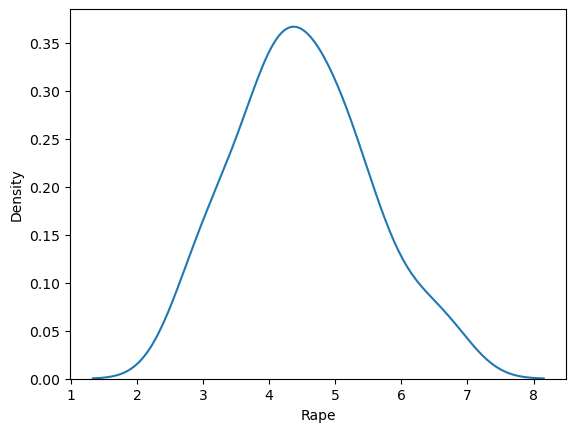

In [20]:
for i in df1.columns:
    print(i)
    sns.kdeplot(df1[i])
    plt.show()

Insights :  

-  From the above plots we can clearly see that our data is already normalize, so here is no need of normalization

In [21]:
df1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.823669,0.135923,0.651732
Assault,0.823669,1.000000,0.291774,0.697776
UrbanPop,0.135923,0.291774,1.000000,0.432861
Rape,0.651732,0.697776,0.432861,1.000000


<AxesSubplot:>

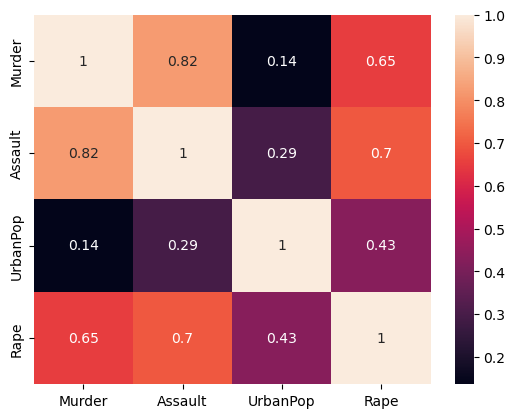

In [22]:
sns.heatmap(df1.corr(),annot=True)

Insights :

-  .corr() means corelaton how data is corelated to each other

-  we have to see how our data is corelated and remove the highly corelated data.

-  With the help sns.heat(corr) we visualize the corelation between the features

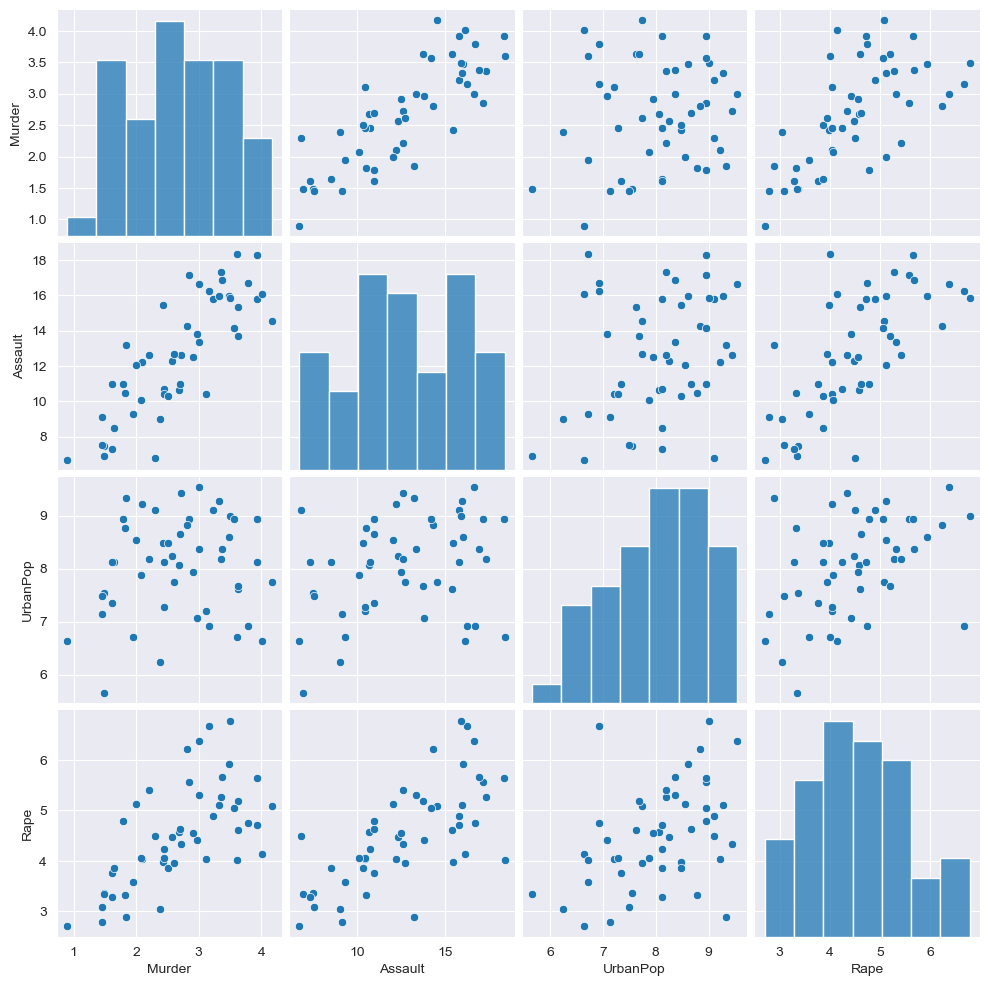

In [23]:
#Format the plot background and scatter plots for all the variables
#cheking is corelation between features by pairplot
sns.set_style(style='darkgrid')
sns.pairplot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2392cbc1cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2392cbc1760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2392b643a30>],
 'medians': [<matplotlib.lines.Line2D at 0x2392cbc1fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2392cbb9490>],
 'means': []}

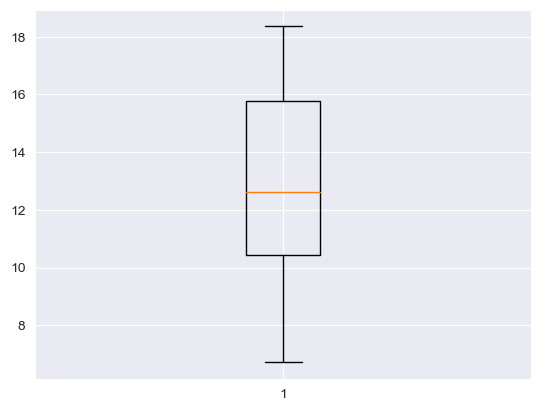

In [24]:
plt.boxplot(df1['Assault']) # for detecting outlier use boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x2392dc45760>,
 'caps': [<matplotlib.lines.Line2D at 0x2392dc45d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2392dc45490>],
 'medians': [<matplotlib.lines.Line2D at 0x2392dc502e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2392dc505b0>],
 'means': []}

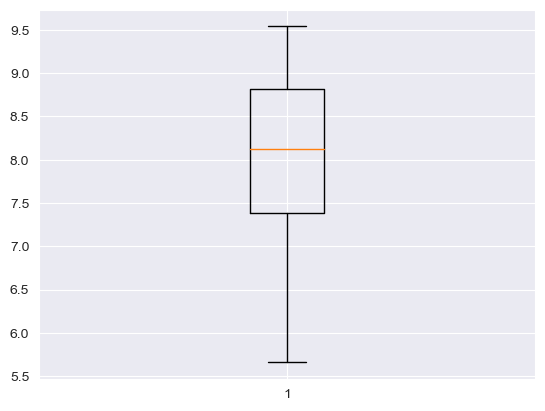

In [25]:
plt.boxplot(df1['UrbanPop']) # for detecting outlier use boxplot

Insights :

1)To see outlier we use boxplot

2) In current Scenario features does not contains any outliers. our data is perfect

In [26]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

Insights :

-  Here we are creating a function which is normalization function and the main goal of this functon is to transform features to be on a similiar scale.

Hierarchical Clustering

Insights :

-  Creating Dendrogram and dendrogram is a diagram that shows hierarchical relationship between objects.

-  The main use of a dendrogram is to work out the best way to allocate objects to clusters

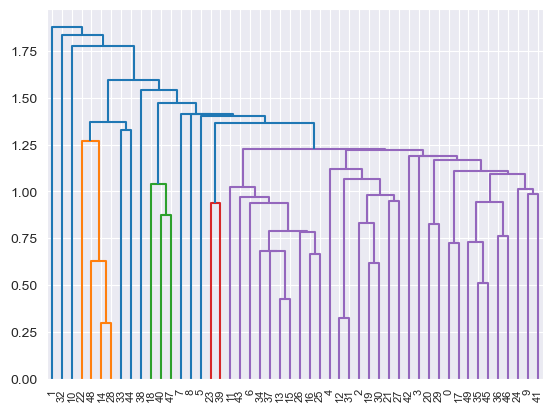

In [27]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='single'))

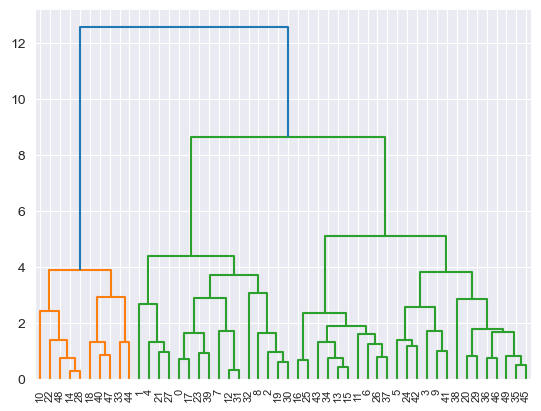

In [28]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='complete'))

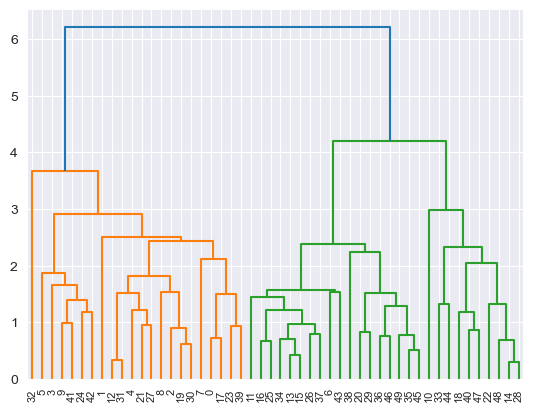

In [29]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='average'))

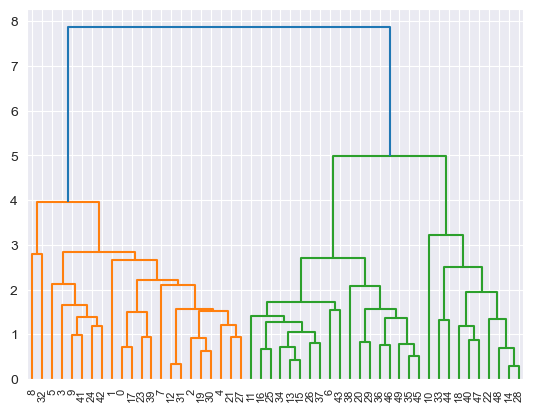

In [30]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='weighted'))

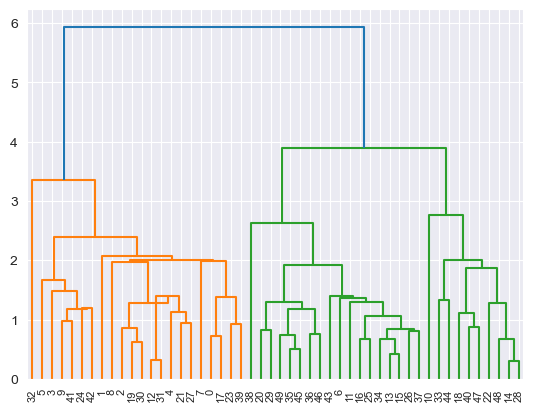

In [31]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='centroid'))

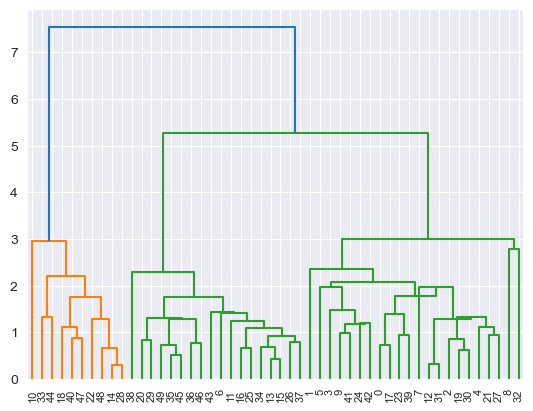

In [32]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df1, method='median'))

Insights : 

-  In above we can see different diagrams of a dendrograms with different methods. 

-  On the above dendrogram besis we can say that the method -'Complete' use in the dendrogram is look perfect in visualization

In [33]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

Insights :

-  Agglomerative Clustering is a type of hierarchical clustering algorithm.

-  It's divides the data points into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar

In [34]:
df1.values

array([[ 3.63318042, 15.3622915 ,  7.61577311,  4.60434577],
       [ 3.16227766, 16.21727474,  6.92820323,  6.67083203],
       [ 2.84604989, 17.1464282 ,  8.94427191,  5.56776436],
       [ 2.96647939, 13.78404875,  7.07106781,  4.41588043],
       [ 3.        , 16.61324773,  9.53939201,  6.37181293],
       [ 2.81069386, 14.28285686,  8.83176087,  6.22093241],
       [ 1.81659021, 10.48808848,  8.77496439,  3.33166625],
       [ 2.42899156, 15.42724862,  8.48528137,  3.97492138],
       [ 3.92428337, 18.30300522,  8.94427191,  5.6480085 ],
       [ 4.17133072, 14.52583905,  7.74596669,  5.07937004],
       [ 2.30217289,  6.78232998,  9.11043358,  4.49444101],
       [ 1.61245155, 10.95445115,  7.34846923,  3.76828874],
       [ 3.2249031 , 15.77973384,  9.11043358,  4.89897949],
       [ 2.68328157, 10.63014581,  8.06225775,  4.58257569],
       [ 1.4832397 ,  7.48331477,  7.54983444,  3.36154726],
       [ 2.44948974, 10.72380529,  8.1240384 ,  4.24264069],
       [ 3.1144823 , 10.

In [35]:
df_val = df1.values

In [36]:
hc.fit(df_val)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [37]:
y_hc=hc.labels_

In [38]:
y_hc

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [39]:
df['Clusters']=hc.labels_

Insights :

-  Assing clusters to the data frame (df)

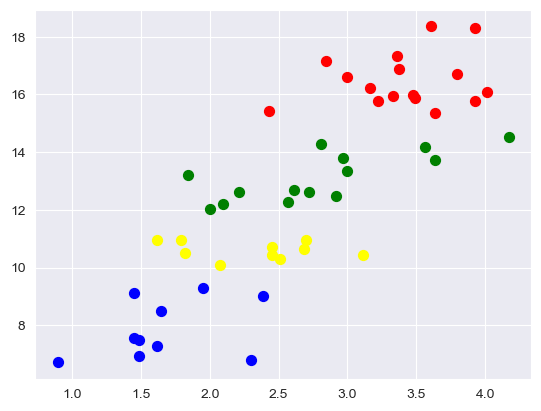

In [40]:
plt.scatter(df_val[y_hc==0,0],df_val[y_hc==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[y_hc==1,0],df_val[y_hc==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[y_hc==2,0],df_val[y_hc==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[y_hc==3,0],df_val[y_hc==3,1],s=50,marker='o',color='yellow')
#plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Data Count in each Cluster 

Text(0.5, 1.0, 'Data counts in cluster')

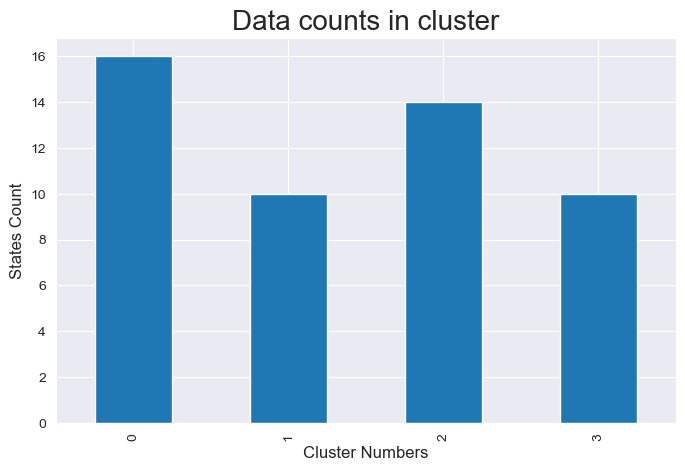

In [41]:
plt.figure(figsize=(8,5))
df.groupby(df['Clusters']).count()['Unnamed: 0'].plot(kind='bar')
plt.xlabel('Cluster Numbers',size=12)
plt.ylabel('States Count',size=12)
plt.title('Data counts in cluster',size=20)

KMEANS

In [42]:
#!pip install threadpoolctl==3.1.0.
#!conda install -c conda-forge threadpoolctl
from threadpoolctl import threadpool_info, threadpool_limits

In [43]:
# Importing library for KMeans
from sklearn.cluster import KMeans

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


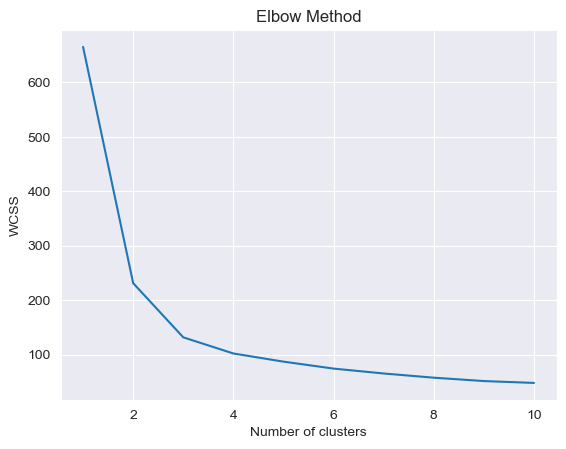

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(df1)

In [ ]:
clusters_new.labels_

In [ ]:
kmean_cluster = clusters_new.labels_

In [ ]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [ ]:
df.head()  # use .head to see first 5 element of DataFrame

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

In [ ]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

Visualisation of KMEANS cluster

In [ ]:
plt.scatter(df_val[kmean_cluster==0,0],df_val[kmean_cluster==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[kmean_cluster==1,0],df_val[kmean_cluster==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[kmean_cluster==2,0],df_val[kmean_cluster==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[kmean_cluster==3,0],df_val[kmean_cluster==3,1],s=50,marker='o',color='yellow')
#plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Data COunts in Kmeans cluster

In [ ]:
plt.figure(figsize=(8,5))
df.groupby(df['clusterid_new']).count()['Unnamed: 0'].plot(kind='bar')
plt.xlabel('Cluster Numbers',size=12)
plt.ylabel('States Count',size=12)
plt.title('Data counts in cluster',size=20)

DBSCAN Clustring

In [ ]:
#Import DBSCAN library
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=3)
dbscan.fit(df1)

In [ ]:
#Noisy samples are given the label -1.
dbscan =dbscan.labels_

In [ ]:
dbscan

In [ ]:
df['DBSCAN'] = dbscan

Visualization of DBSCAN

In [ ]:
plt.scatter(df_val[dbscan==0,0],df_val[dbscan==0,1],s=50,marker='o',color='red')
plt.scatter(df_val[dbscan==1,0],df_val[dbscan==1,1],s=50,marker='o',color='blue')
plt.scatter(df_val[dbscan==2,0],df_val[dbscan==2,1],s=50,marker='o',color='green')
plt.scatter(df_val[dbscan==-1,0],df_val[dbscan==-1,1],s=50,marker='o',color='yellow')
#plt.scatter(df_val[y_hc==4,0],df_val[y_hc==4,1],s=50,marker='o',color='ORANGE')
#plt.scatter(df_new[y_hc==5,0],df_new[y_hc==5,1],s=50,marker='o',color='black')
#plt.scatter(df_new[y_hc==6,0],df_new[y_hc==6,1],s=50,marker='o',color='purple')
#plt.scatter(df_new[y_hc==7,0],df_new[y_hc==7,1],s=50,marker='o',color='PINK')
plt.show()

Data Counts in DBSCAN

In [ ]:
plt.figure(figsize=(8,5))
df.groupby(df['DBSCAN']).count()['Unnamed: 0'].plot(kind='bar')
plt.xlabel('DBSCAN Numbers',size=12)
plt.ylabel('States Count',size=12)
plt.title('Data counts in DBSCAN',size=20)

Insights :

-  Here we are used KMEAN and DBSCAN clustering both are working same i.e. grouping the similers data points together but in KMEANS similirity is measured by using Eucliden Distance however in DBSCAN neighbourhood of each point in a cluster which is within a given radius must have minimum number of points.

-  we can use this types of cluster for filling NA values, filtering the null values and after that checking the near clusters and according to that taking mean/mod/median we can fill our NA data more accureatly while filling randomly mean/mode/median of all data.